<a href="https://colab.research.google.com/github/miladshiraniUCB/dsc-phase-3-project-from-kaggle/blob/main/Copy_of_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do:

* add Confusion matrix
* add classification report
* do not use accuracy
* Use CatBoost, XGBoost, LightGBM and FLAML
* Use RandomizedSearchCV and GridSearchCV for tuning hyper parameters
* 

# Introduction

Heart Diesease is one of the main causes of death in the United State and there has been several researches to understand the how we can control and treat heart disease to reduce the number of death. In this work, by using the available data from [kaggle.com](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), we try to find the features that have highest impact on heart disease by introducing a comprehensive model to predict if a person will have heart disease in future or not. 

This dataset has the following columns and the dexscription of each feature is from [here](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

* `HeartDisease`, Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

* `BMI`, Body Mass Index (BMI)

* `Smoking`, Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

* `AlcoholDrinking`, Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

* `Stroke`, (Ever told) (you had) a stroke?

* `PhysicalHealth`, Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

* `MentalHealth`, Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

* `DiffWalking`, Do you have serious difficulty walking or climbing stairs?

* `Sex`, Are you male or female?

* `AgeCategory`, Fourteen-level age category

* `Race`, Imputed race/ethnicity value

* `Diabetic`, (Ever told) (you had) diabetes?

* `PhysicalActivity`, Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

* `GenHealth`, Would you say that in general your health is...

* `SleepTime`, On average, how many hours of sleep do you get in a 24-hour period?

* `Asthma`, (Ever told) (you had) asthma?

* `KidneyDisease`, Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

* `SkinCancer`, (Ever told) (you had) skin cancer?

In this work, we will use the following suprevised categorial models, XGBoost, CatBoost, Decision Tree, Random Forest, FLAML and LightGBM. And we will compare their results and will introduce the final model at the end of this work. 




# Importing Data and Libraries we use 

Decause we are using Google Colab for this project, we need to import data from the [GitHub repository[(https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git), so at the beginning of this work we write 

``` ! git clone https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git``` 

to import the data.

In [21]:
! git clone https://github.com/miladshiraniUCB/dsc-phase-3-project-from-kaggle.git

fatal: destination path 'dsc-phase-3-project-from-kaggle' already exists and is not an empty directory.


In [23]:
import numpy as np
import pandas as pd
import io

from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE, ADASYN


# from xgboost import XGBClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Data can be found in (/content/dsc-phase-3-project-from-kaggle/heart_2020_cleaned.csv). To import the data we use `pd.read_csv` as shown below:

In [24]:
df = pd.read_csv("/content/dsc-phase-3-project-from-kaggle/heart_2020_cleaned.csv")
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The get insight into this data frame we use

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

By using `df.isna().sum()` we see that there is no any missing value in the dataframe

In [27]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [31]:
Binray_Features_YN = {}
MultiVar_Features = {}
Numerical_features = {}
for item in df.columns:
  
  if df[item].dtype == "O" and df[item].nunique() == 2:
    Binray_Features_YN[item] = dict(df[item].value_counts(normalize = True)*100)
  if df[item].dtype == "O" and df[item].nunique() > 2:
    MultiVar_Features[item] = dict(df[item].value_counts(normalize = True)*100)
  if df[item].dtype == 'float64':
    Numerical_features[item] = dict(df[item].value_counts(normalize = True)*100)  



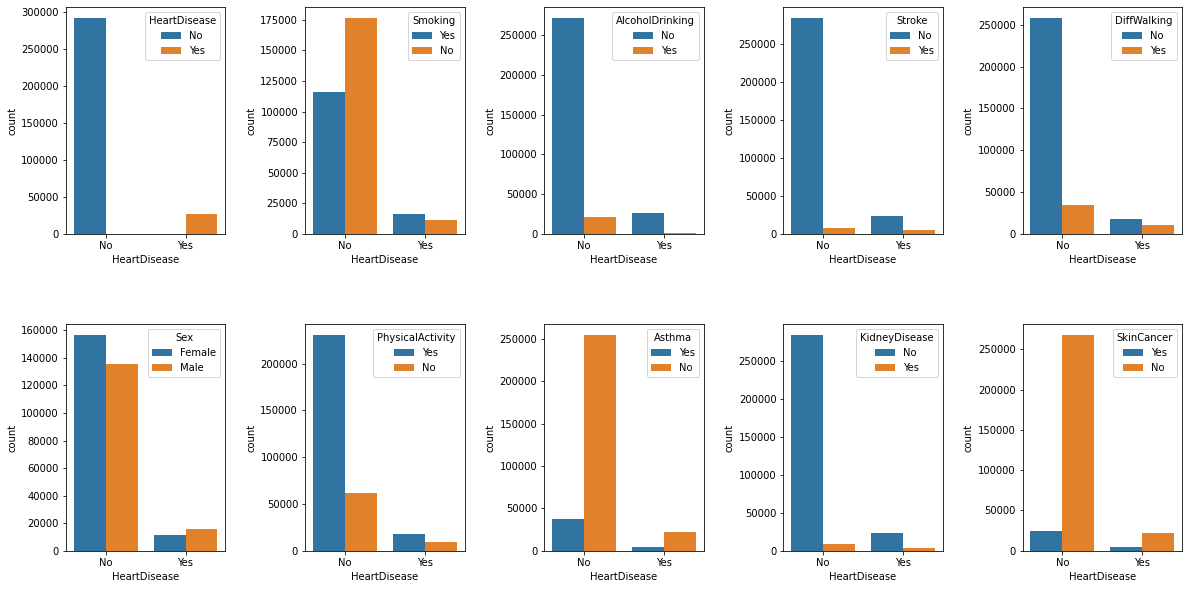

In [32]:
figs, axes = plt.subplots(nrows= 2 , ncols=5, figsize = (20, 10))

figs.subplots_adjust(hspace=0.4, wspace=0.5)

for i, item in enumerate(Binray_Features_YN):
  ax = axes[i//5][i%5]
  sns.countplot(data=df,x="HeartDisease",hue=item, ax = ax);

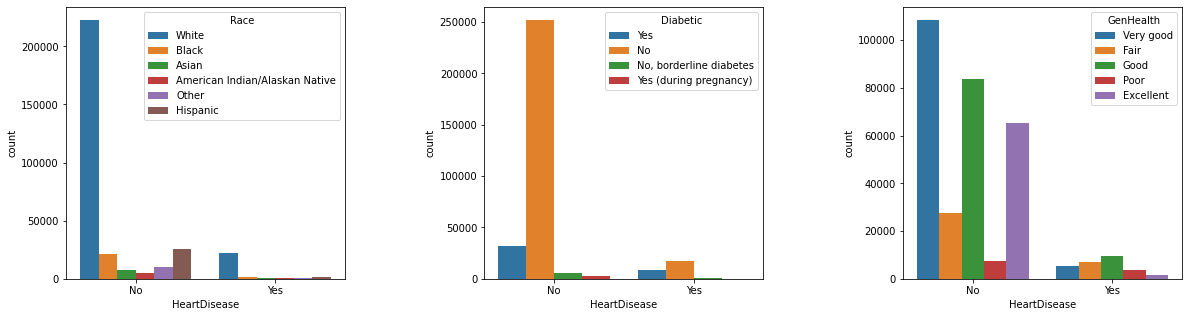

In [33]:
figs, axes = plt.subplots(nrows= 1 , ncols=3, figsize = (20, 5))

figs.subplots_adjust(hspace=0.4, wspace=0.5)
l = list(MultiVar_Features.keys())
l.remove("AgeCategory")
for i, item in enumerate(l):
  ax = axes[i]
  sns.countplot(data=df,x="HeartDisease",hue=item, ax = ax);

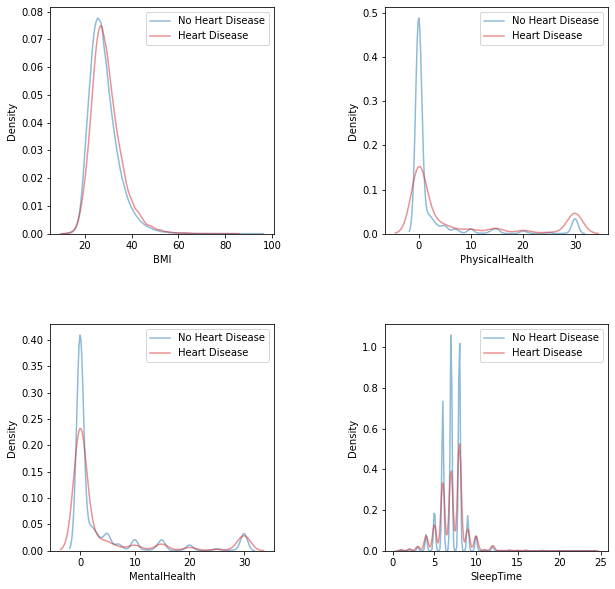

In [34]:
figs, axes = plt.subplots(nrows= 2 , ncols=2, figsize = (10, 10))

figs.subplots_adjust(hspace=0.4, wspace=0.5)

for i, item in enumerate(Numerical_features):
  
  ax = axes[i//2][i%2]
  sns.kdeplot(df.loc[df["HeartDisease"]== "No"][item], 
             color = "tab:blue", alpha = 0.5, label = "No Heart Disease", 
            ax = ax)
  sns.kdeplot(df.loc[df["HeartDisease"]== "Yes"][item], 
             color = "tab:red", alpha = 0.5, label = "Heart Disease",
             ax = ax)

  ax.legend();

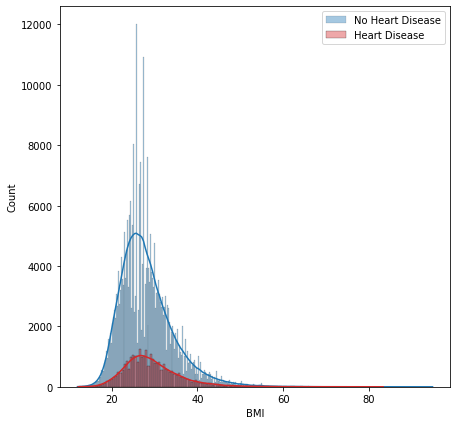

In [35]:

plt.figure(figsize=(7,7))
sns.histplot(df.loc[df["HeartDisease"]== "No"]["BMI"], 
             color = "tab:blue", alpha = 0.4, label = "No Heart Disease", 
            kde = True)
sns.histplot(df.loc[df["HeartDisease"]== "Yes"]["BMI"], 
             color = "tab:red", alpha = 0.4, label = "Heart Disease",
            kde = True)
# plt.show()
plt.legend();

# Data Preparation 

In [36]:

df_2 = df.copy()

Yes_No_dict = {"No":0, "Yes":1, "Female":1, "Male":0} 

Yes_No_List = list(Binray_Features_YN.keys())

Yes_No_List.remove("HeartDisease")


for col in Yes_No_List:
  
  df_2[col] = df_2[col].map(Yes_No_dict)
 


#### Encoding By using OneHotEncoder

cat = list(MultiVar_Features.keys())
df_2_cat = df_2[cat].copy()


ohe = OneHotEncoder(categories='auto', sparse=False, drop="first")

df_2_cat_encoded = ohe.fit_transform(df_2_cat)
df_2_cat_encoded_df = pd.DataFrame(np.squeeze(df_2_cat_encoded), columns = ohe.get_feature_names())



##### Scaling By using StandardScaler
scaler = StandardScaler()

numeric = list(Numerical_features.keys())
df_2_numeric = df_2[numeric].copy()


df_2_scaled_numeric = scaler.fit_transform(df_2_numeric) 
df_2_scaled_numeric_df = pd.DataFrame(np.squeeze(df_2_scaled_numeric), columns = df_2_numeric.columns)


# # # #### Concatating New DataFrames

df_2_ready = pd.concat([df_2[Yes_No_List],df_2_cat_encoded_df, df_2_scaled_numeric_df], axis = 1)



y = df_2["HeartDisease"].map({"Yes": 1, "No": 0})
X = df_2_ready
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 42, 
                                                    test_size = 0.2, 
                                                    stratify=y)


X_train_original = X_train.copy()
X_test_original = X_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()


smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("y_train:", dict(y_train.value_counts(normalize = True)*100))
print("y_train_smote:", dict(y_train_smote.value_counts(normalize = True)*100))
print("y_test:", dict(y_test.value_counts(normalize = True)*100))



y_train: {0: 91.44061039103175, 1: 8.559389608968246}
y_train_smote: {0: 50.0, 1: 50.0}
y_test: {0: 91.43982864022264, 1: 8.560171359777357}


# Decision Tree

First model that we are going to train is Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 5)

tree_clf.fit(X_train_smote, y_train_smote)

test_preds_tree = tree_clf.predict(X_test)

test_fpr_tree , test_tpr_tree , test_thresh_tree = roc_curve(y_test, test_preds_tree)
# AUC

test_auc_tree = auc(test_fpr_tree, test_tpr_tree)

print(test_auc)
print('Validation AUC: {:.4}'.format(test_auc_tree))
print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds_tree)))
print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds_tree)))
print("f1_score: {:.4}".format(f1_score(y_test, test_preds_tree)))

0.6825266466354298
Validation AUC: 0.6825
Test precision_score: 0.1743
Test recall_score: 0.6561
f1_score: 0.2754


**Results** are 

```python
0.6825266466354298
Validation AUC: 0.6825
Test precision_score: 0.1743
Test recall_score: 0.6561
f1_score: 0.2754
```

In [53]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.09009872,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06588529,
       0.16875185, 0.        , 0.        , 0.        , 0.        ,
       0.00596204, 0.        , 0.37426627, 0.        , 0.        ,
       0.        , 0.01017531, 0.04541123, 0.        , 0.2394493 ,
       0.        , 0.        ])

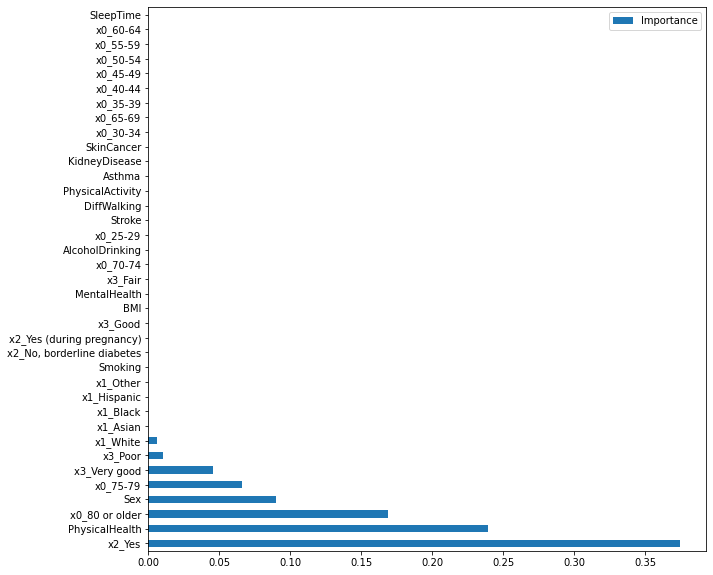

In [59]:
import matplotlib.pyplot as plt

tree_feat_importances = pd.DataFrame(tree_clf.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
tree_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
tree_feat_importances.plot(kind='barh', figsize=(10,10));

**Results:**  We find the `auc` score as 0.6825266466354298. Now we will use gridsearch to find a better tuning parameters for the hyperprameters.

In [52]:
tree_param_grid = {"max_depth": [10, 15, 20],
                  "min_samples_split": [2, 3],
                  # "max_leaf_nodes": [2, 3],
                  "random_state" : [42], 
                  "criterion" : ["entropy", "gini"]
                  }

tree_grid = DecisionTreeClassifier()

tree_grid_search = GridSearchCV(tree_grid, tree_param_grid, cv = None)


# Fit to the data
tree_grid_search.fit(X_train_smote, y_train_smote)
test_preds_tree_grid = tree_grid_search.predict(X_test)

grid_tree_fpr , grid_tree_tpr , grid_tree_thresh = roc_curve(y_test, test_preds_tree_grid)
# AUC

grid_tree_auc = auc(grid_tree_fpr, grid_tree_tpr)

print(grid_tree_auc)

print('Validation AUC: {:.4}'.format(grid_tree_auc))
print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds_tree_grid)))
print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds_tree_grid)))
print("f1_score: {:.4}".format(f1_score(y_test, test_preds_tree_grid)))

0.6571551474563234
Validation AUC: 0.6572
Test precision_score: 0.2235
Test recall_score: 0.4658
f1_score: 0.3021


**Result**: By using the gride search we find `auc` as 0.6533021465653175 and the rest are

```python

0.6571551474563234
Validation AUC: 0.6572
Test precision_score: 0.2235
Test recall_score: 0.4658
f1_score: 0.3021
```

and the best parameters are:

```python

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 3,
 'min_samples_split': 2,
 'random_state': 42}
 ```

In [42]:
tree_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 3,
 'min_samples_split': 2,
 'random_state': 42}

In [58]:
tree_grid_search.best_estimator_.feature_importances_

array([0.01059807, 0.00509615, 0.0053563 , 0.00595552, 0.05475889,
       0.01069546, 0.00623593, 0.00333798, 0.00655372, 0.00137177,
       0.00190316, 0.00296169, 0.0046254 , 0.00569775, 0.01048485,
       0.01613913, 0.02539314, 0.03220667, 0.04421767, 0.04034048,
       0.07437621, 0.00145107, 0.00377052, 0.00384855, 0.00324837,
       0.02255813, 0.00432628, 0.1471027 , 0.00099298, 0.03026767,
       0.02788458, 0.01797632, 0.03672   , 0.06549134, 0.15912393,
       0.03860287, 0.06832875])

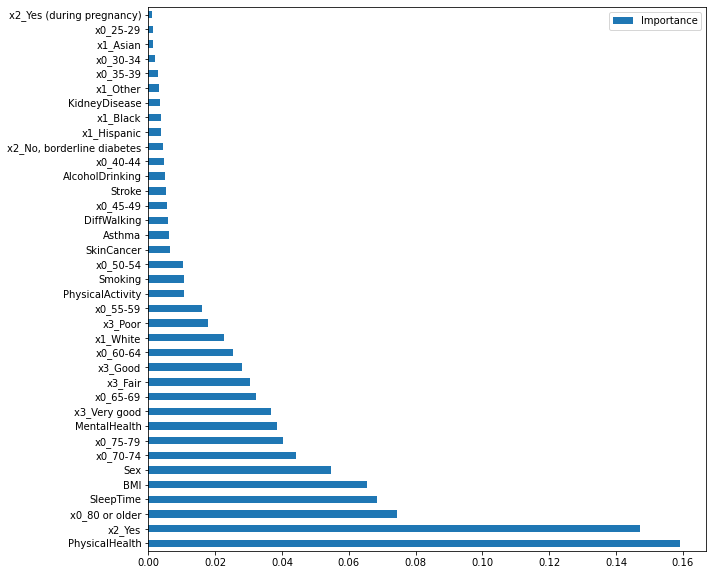

In [60]:
import matplotlib.pyplot as plt

tree_grid_feat_importances = pd.DataFrame(tree_grid_search.best_estimator_.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
tree_grid_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
tree_grid_feat_importances.plot(kind='barh', figsize=(10,10));

In [45]:
# from sklearn import tree
# fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (5,5), dpi=300)
# tree.plot_tree(tree_clf,
#                feature_names = X_train.columns, 
#                class_names=np.unique(y).astype('str'),
#                filled = True)
# plt.show()

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy", bootstrap = True)

rf.fit(X_train_smote, y_train_smote)

test_preds_rf     = rf.predict(X_test)


### ROC and AUC
# ROC
test_fpr_rf , test_tpr_rf , test_thresh_rf = roc_curve(y_test, test_preds_rf)
# AUC

test_auc_rf = auc(test_fpr_rf, test_tpr_rf)



print('Validation AUC: {:.4}'.format(test_auc_rf))
print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds_rf)))
print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds_rf)))
print("f1_score: {:.4}".format(f1_score(y_test, test_preds_rf)))

Validation AUC: 0.5995
Test precision_score: 0.2508
Test recall_score: 0.2762
f1_score: 0.2629


**Results** are:

```python
Validation AUC: 0.5995
Test precision_score: 0.2508
Test recall_score: 0.2762
f1_score: 0.2629
```

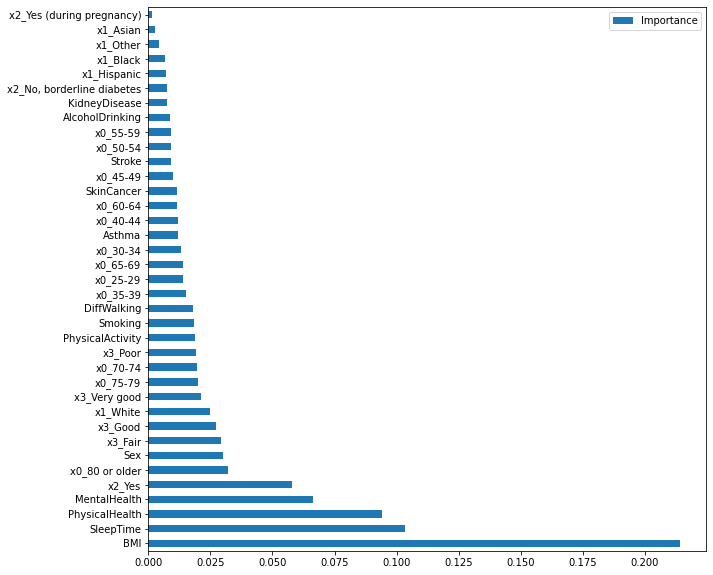

In [63]:
import matplotlib.pyplot as plt

rf_feat_importances = pd.DataFrame(rf.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
rf_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
rf_feat_importances.plot(kind='barh', figsize=(10,10));

In [66]:
from sklearn.model_selection import RandomizedSearchCV

randomized_rf = RandomForestClassifier()

params = {"max_depth": [5, 10, 15, 20],
          "criterion":["gini", "entropy"], 
          "bootstrap" :[True],
          "max_leaf_nodes": [5, 10, 15, 20],
          "min_samples_split" : [2, 4, 6, 8]
          }

rf_tunned = RandomizedSearchCV(randomized_rf, params, cv = None,
                              random_state = 42)      


# Fit to the data
rf_tunned.fit(X_train_smote, y_train_smote)
test_preds_rf_tunned = rf_tunned.predict(X_test)

rf_tunned_fpr , rf_tunned_tpr , rf_tunned_thresh = roc_curve(y_test, 
                                                             test_preds_rf_tunned)
# AUC

rf_tunned_auc = auc(rf_tunned_fpr, rf_tunned_tpr)

print(rf_tunned_auc)

print('Validation AUC: {:.4}'.format(rf_tunned_auc))
print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds_rf_tunned)))
print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds_rf_tunned)))
print("f1_score: {:.4}".format(f1_score(y_test, test_preds_rf_tunned)))



0.7360068194899498
Validation AUC: 0.736
Test precision_score: 0.2168
Test recall_score: 0.7132
f1_score: 0.3325


In [67]:
rf_tunned.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_split=8)

In [68]:
rf_tunned.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_samples_split': 8}

**Results** of this tunning are as follows

```python
0.7360068194899498
Validation AUC: 0.736
Test precision_score: 0.2168
Test recall_score: 0.7132
f1_score: 0.3325
```

and the best estimator is:

```python 
max_depth=10, 
max_leaf_nodes=20, 
min_samples_split=8
```

and the best parameters are:

```python
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_samples_split': 8}
 ```

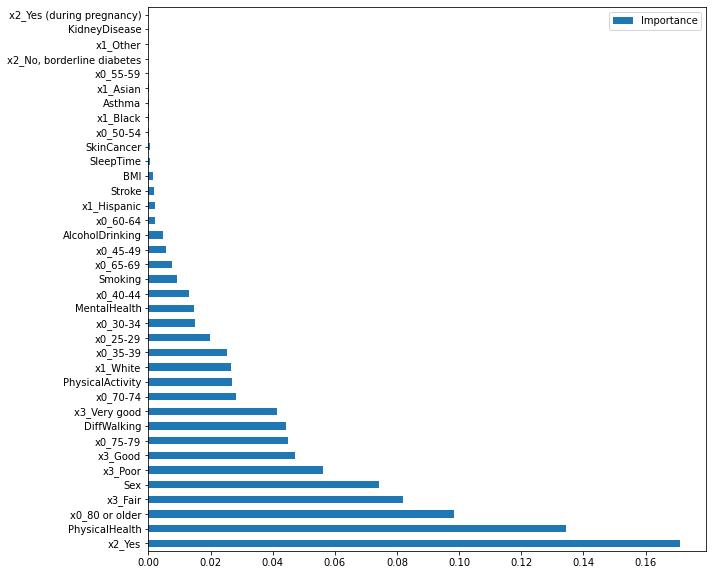

In [70]:
import matplotlib.pyplot as plt

rf_tunned_feat_importances = pd.DataFrame(rf_tunned.best_estimator_.feature_importances_, 
                                index=X_train_smote.columns, columns=["Importance"])
rf_tunned_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
rf_tunned_feat_importances.plot(kind='barh', figsize=(10,10));

# XGBoost

The following Box is from [here](https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api) and also check [this](https://xgboost.readthedocs.io/en/stable/tutorials/custom_metric_obj.html)

or the first link is

```
https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api
```

and the second link is

```
https://xgboost.readthedocs.io/en/stable/tutorials/custom_metric_obj.html
```

In [ ]:
# {'alpha': 10,
#  'eval_metric': 'auc',
#  'max_depth': 10,
#  'n_estimators': 15,
#  'objective': 'binary:logistic',
#  'seed': 42}

# smote_params = {'alpha': 10,
#                 'eval_metric': 'auc',
#                 'max_depth': 10,
#                 'n_estimators': 15,
#                 'objective': 'binary:logistic',
#                 'seed': 42}


clf = xgb.XGBClassifier(max_depth = 10, n_estimators= 15, seed=42,
                        alpha = 10, 
                        objective = 'binary:logistic', 
                        eval_metric = "auc")

clf.fit(X_train_smote, y_train_smote);

In [ ]:
test_preds = clf.predict(X_test)


### ROC and AUC
# ROC

test_fpr , test_tpr , test_thresh = roc_curve(y_test, test_preds)
# AUC

test_auc = auc(test_fpr, test_tpr)



print('Validation AUC: {:.4}'.format(test_auc))
print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds)))
print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds)))
print("f1_score: {:.4}".format(f1_score(y_test, test_preds)))

Validation AUC: 0.7235
Test precision_score: 0.2035
Test recall_score: 0.7054
f1_score: 0.3159


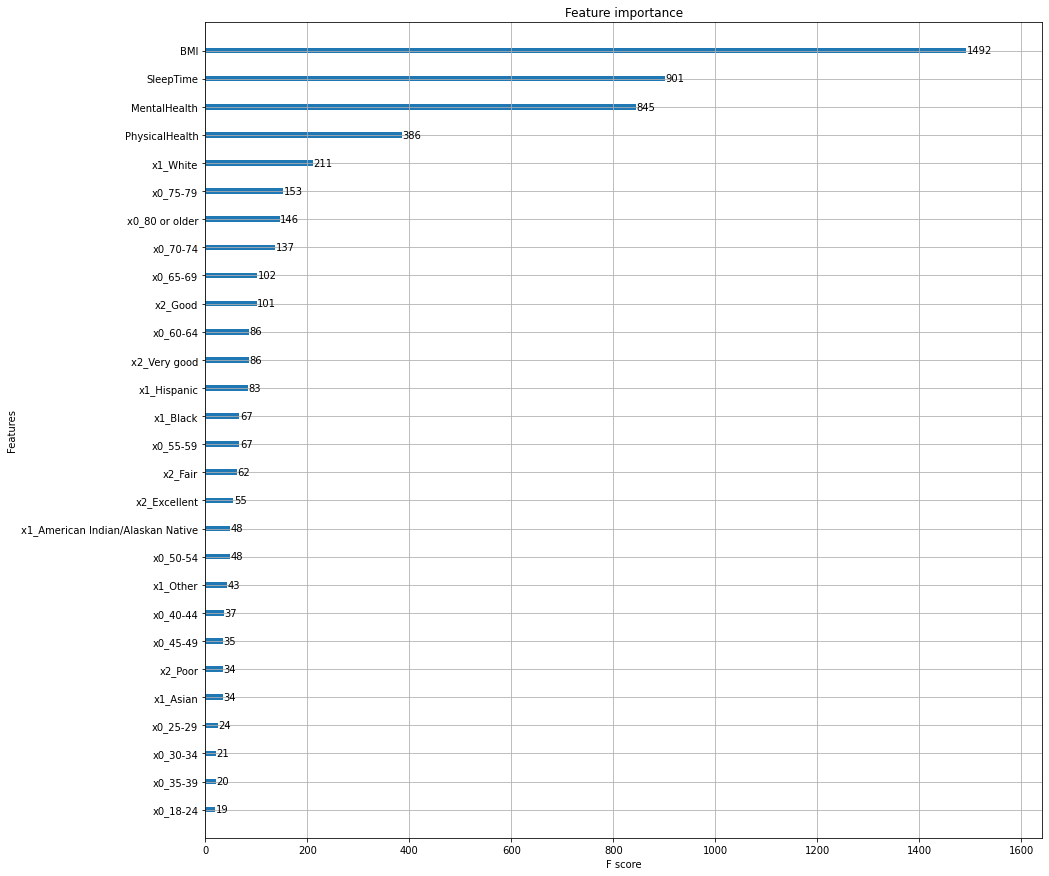

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15, 15))
xgb.plot_importance(clf, ax = ax);

## GridSearch For XGBoost 

By using GridSearch we find the following. It takes times to find it so, make sure that you are not running this section.

```python

best_parameters = {'alpha': 30,
 'eta': 0.3,
 'eval_metric': 'auc',
 'max_depth': 10,
 'n_estimators': 25,
 'objective': 'binary:logistic',
 'seed': 42}

```

the accuracy results that we find are:

```python
Training Accuracy: 91.61%
Validation accuracy: 91.6%
```

In [ ]:
# clf_param_grid = {
#     "max_depth": [5, 10],
#     "n_estimators": [10, 15],
#     "seed": [42],
#     "alpha": [20, 25],
#     "objective" : ['binary:logistic'], 
#     "eval_metric" : ["auc"]
# }

In [ ]:
# clf_grid = xgb.XGBClassifier()

# clf_grid_search = GridSearchCV(clf_grid, clf_param_grid, cv = None)


# # Fit to the data
# clf_grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'alpha': [20, 25], 'eval_metric': ['auc'],
                         'max_depth': [5, 10], 'n_estimators': [10, 15],
                         'objective': ['binary:logistic'], 'seed': [42]})

In [ ]:

# test_preds_grid     = clf_grid_search.predict(X_test)


# ### ROC and AUC
# # ROC

# test_fpr_grid , test_tpr_grid , test_thresh_grid = roc_curve(y_test, test_preds_grid)
# # AUC

# test_auc_grid = auc(test_fpr_grid, test_tpr_grid)



# print('Validation AUC: {:.4}'.format(test_auc_grid))
# print("Test precision_score: {:.4}".format(precision_score(y_test, test_preds_grid)))
# print("Test recall_score: {:.4}".format(recall_score(y_test, test_preds_grid)))
# print("f1_score: {:.4}".format(f1_score(y_test, test_preds_grid)))

Validation AUC: 0.7196
Test precision_score: 0.204
Test recall_score: 0.6919
f1_score: 0.3151


In [ ]:
# clf_grid_search.best_params_

{'alpha': 20,
 'eval_metric': 'auc',
 'max_depth': 10,
 'n_estimators': 15,
 'objective': 'binary:logistic',
 'seed': 42}

In [ ]:
# clf_grid_search.best_params_ = {'alpha': 20,
#  'eval_metric': 'auc',
#  'max_depth': 10,
#  'n_estimators': 15,
#  'objective': 'binary:logistic',
#  'seed': 42}

# Microsoft FLAML A Fast Library for Automated Machine Learning & Tuning

It can be found [here](https://github.com/microsoft/FLAML) or using the following link
```https://github.com/microsoft/FLAML```


In [ ]:
! pip install flaml

     |████████████████████████████████| 157 kB 10.4 MB/s 
     |████████████████████████████████| 2.0 MB 50.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
!pip install flaml[notebook];

     |████████████████████████████████| 757 kB 9.6 MB/s 
     |████████████████████████████████| 158 kB 46.5 MB/s 
     |████████████████████████████████| 76.1 MB 46 kB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=724c94fd0f6167db8d150f141cb148f508e61308d185687507035f369390c97e
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=22ff157bfaccc0b3c784bb79e6bc0b4416255d37053352d070442f45df6515d4
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


In [ ]:
df_FLAML = df.copy()
df_FLAML["HeartDisease"] = df_FLAML["HeartDisease"].map({"No": 0 , "Yes": 1})

X_new = df_FLAML.drop("HeartDisease", axis = 1)
y_new = df_FLAML.HeartDisease


X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new,
                                                           test_size = 0.2,
                                                           random_state = 42)

In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train_n, y_train_n, task="classification", metric = "roc_auc", estimator_list=['rf','xgboost']);

[flaml.automl: 04-02 09:18:06] {2105} INFO - task = classification
[flaml.automl: 04-02 09:18:06] {2107} INFO - Data split method: stratified
[flaml.automl: 04-02 09:18:06] {2111} INFO - Evaluation method: holdout
[flaml.automl: 04-02 09:18:06] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-02 09:18:06] {2281} INFO - List of ML learners in AutoML Run: ['rf', 'xgboost']
[flaml.automl: 04-02 09:18:06] {2567} INFO - iteration 0, current learner rf
[flaml.automl: 04-02 09:18:07] {2698} INFO - Estimated sufficient time budget=87911s. Estimated necessary time budget=88s.
[flaml.automl: 04-02 09:18:07] {2750} INFO -  at 3.4s,	estimator rf's best error=0.2179,	best estimator rf's best error=0.2179
[flaml.automl: 04-02 09:18:07] {2567} INFO - iteration 1, current learner xgboost
[flaml.automl: 04-02 09:18:07] {2750} INFO -  at 3.5s,	estimator xgboost's best error=0.2249,	best estimator rf's best error=0.2179
[flaml.automl: 04-02 09:18:07] {2567} INFO - iteration 2, current l

In [ ]:
y_test_pred_FLAML = automl.predict(X_test_n)


In [ ]:
print(automl.model.estimator)

XGBClassifier(colsample_bylevel=0.8490633393816673,
              colsample_bytree=0.8501582165474667, grow_policy='lossguide',
              learning_rate=0.052998640031981195, max_depth=0, max_leaves=279,
              min_child_weight=4.05164716830016, n_estimators=231, n_jobs=-1,
              reg_alpha=0.011728535554234117, reg_lambda=0.8243892535277468,
              subsample=0.7323612940065832, tree_method='hist',
              use_label_encoder=False, verbosity=0)


In [ ]:
### WE Found
# XGBClassifier(colsample_bylevel=0.8490633393816673,
#               colsample_bytree=0.8501582165474667, grow_policy='lossguide',
#               learning_rate=0.052998640031981195, max_depth=0, max_leaves=279,
#               min_child_weight=4.05164716830016, n_estimators=231, n_jobs=-1,
#               reg_alpha=0.011728535554234117, reg_lambda=0.8243892535277468,
#               subsample=0.7323612940065832, tree_method='hist',
#               use_label_encoder=False, verbosity=0)

In [ ]:
### ROC and AUC
# ROC

test_fpr_FLAML , test_tpr_FLAML , test_thresh_FLAML = roc_curve(y_test_n, y_test_pred_FLAML)
# AUC

test_auc_FLAML = auc(test_fpr_FLAML, test_tpr_FLAML)



print('Validation AUC: {:.4}'.format(test_auc_FLAML))
print("Test precision_score: {:.4}".format(precision_score(y_test_n, y_test_pred_FLAML)))
print("Test recall_score: {:.4}".format(recall_score(y_test_n, y_test_pred_FLAML)))
print("f1_score: {:.4}".format(f1_score(y_test_n, y_test_pred_FLAML)))

Validation AUC: 0.5426
Test precision_score: 0.5204
Test recall_score: 0.09335
f1_score: 0.1583


# New XGBoost Based on FLAML

In [ ]:
params = {
              "colsample_bylevel" : 0.8490633393816673,
              "colsample_bytree" : 0.8501582165474667, 
              "grow_policy" :'lossguide',
              "learning_rate" : 0.052998640031981195, 
              "max_depth" : 0, 
              "max_leaves" : 279,
              "min_child_weight" : 4.05164716830016, 
              "n_estimators" : 231, 
              "n_jobs" : -1,
              "reg_alpha" : 0.011728535554234117, 
              "reg_lambda" : 0.8243892535277468,
              "subsample" : 0.7323612940065832, 
              "tree_method" : 'hist',
              "use_label_encoder" : False,
              "verbosity" : 0
}

Train_dmatrix = xgb.DMatrix(data = X_train_smote, label = y_train_smote)
Test_dmatrix = xgb.DMatrix(data = X_test, label = y_test)

second_xgb = xgb.XGBClassifier(objective='binary:logistic', seed = 42)
cv_results = xgb.cv(dtrain=Train_dmatrix, params=params, nfold=4,
        num_boost_round=10, metrics="auc", as_pandas=True)
# second_xgb.fit(X_train_smote, y_train_smote, param = params)

In [ ]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.854627,0.001704,0.853066,0.001905
1,0.872088,0.002608,0.870449,0.003009
2,0.874828,0.004805,0.873110,0.005454
3,0.881235,0.002437,0.879609,0.002898
4,0.883815,0.003138,0.882166,0.003474
5,0.884879,0.003992,0.883261,0.004362
6,0.887449,0.002664,0.885693,0.002892
7,0.889468,0.002362,0.887712,0.002650
8,0.891043,0.001637,0.889211,0.002004
9,0.892634,0.001092,0.890802,0.001615


In [ ]:
xgb_third = xgb.XGBClassifier(objective='binary:logistic', seed = 42, param = params)

In [ ]:
xgb_third.fit(X_train_smote, y_train_smote)

XGBClassifier(param={'colsample_bylevel': 0.8490633393816673,
                     'colsample_bytree': 0.8501582165474667,
                     'grow_policy': 'lossguide',
                     'learning_rate': 0.052998640031981195, 'max_depth': 0,
                     'max_leaves': 279, 'min_child_weight': 4.05164716830016,
                     'n_estimators': 231, 'n_jobs': -1,
                     'reg_alpha': 0.011728535554234117,
                     'reg_lambda': 0.8243892535277468,
                     'subsample': 0.7323612940065832, 'tree_method': 'hist',
                     'use_label_encoder': False, 'verbosity': 0},
              seed=42)

In [ ]:
xgb_third_preds = xgb_third.predict(X_test)


### ROC and AUC
# ROC

test_fpr_xgb , test_tpr_xgb , test_thresh_xgb = roc_curve(y_test, xgb_third_preds)
# AUC

test_auc_xgb  = auc(test_fpr_xgb, test_tpr_xgb)
precision_xgb = precision_score(y_test, xgb_third_preds)
recall_xgb = recall_score(y_test, xgb_third_preds)
f1_xgb = f1_score(y_test, xgb_third_preds)

print('Validation AUC: {:.4}'.format(test_auc_xgb))
print("Test precision_score: {:.4}".format(precision_xgb))
print("Test recall_score: {:.4}".format(recall_xgb))
print("f1_score: {:.4}".format(f1_xgb))

Validation AUC: 0.7343
Test precision_score: 0.2028
Test recall_score: 0.7414
f1_score: 0.3185


In [ ]:
! git add --all

fatal: not a git repository (or any of the parent directories): .git
